In [1]:
import numpy as np
import scipy.stats
from aisynphys.database import SynphysDatabase
from aisynphys.cell_class import CellClass, classify_cells, classify_pairs
from aisynphys.connectivity import measure_connectivity, pair_was_probed
#from aisynphys.avg_response_fit import response_query

In [2]:
lv=SynphysDatabase.list_versions()
print('versions of ABI STP databases')    
lv

versions of ABI STP databases


['synphys_r1.0_2019-08-29_small.sqlite',
 'synphys_r1.0_2019-08-29_medium.sqlite',
 'synphys_r1.0_2019-08-29_full.sqlite',
 'synphys_r1.0_small.sqlite',
 'synphys_r1.0_medium.sqlite',
 'synphys_r1.0_full.sqlite',
 'synphys_r2.0-pre1_small.sqlite',
 'synphys_r2.0-pre1_medium.sqlite',
 'synphys_r2.0-pre1_full.sqlite',
 'synphys_r2.0-pre2_small.sqlite',
 'synphys_r2.0-pre2_medium.sqlite',
 'synphys_r2.0-pre3_small.sqlite',
 'synphys_r2.0-pre3_medium.sqlite',
 'synphys_r2.0-pre4_small.sqlite',
 'synphys_r2.0-pre4_medium.sqlite']

## 1. Load the data

First, load up the "small" database from release 1.0 and query all cell pairs for mouse projects.

In [4]:
# Download and cache the sqlite file for the requested database

#   (for available versions, see SynphysDatabase.list_versions)

db = SynphysDatabase.load_version('synphys_r1.0_2019-08-29_small.sqlite')

In [5]:
db

<Database sqlite:////home/stepaniu/ai_synphys_cache/database/synphys_r1.0_2019-08-29_small.sqlite (ro)>

In [3]:
db2 = SynphysDatabase.load_version('synphys_r1.0_2019-08-29_medium.sqlite')

In [4]:
db2

<Database sqlite:////home/stepaniu/ai_synphys_cache/database/synphys_r1.0_2019-08-29_medium.sqlite (ro)>

In [7]:
avf=db2.avg_response_fit
avf.__dict__

mappingproxy({'__tablename__': 'avg_response_fit',
              '__table_args__': {'comment': 'Fit to average post synaptic response for a given pair. Each pair may have fits for VC and IC recordings, held at -70 and -55 mV.'},
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463ab48>,
              'pair_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463abf8>,
              'clamp_mode': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463aca8>,
              'holding': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463ad58>,
              'fit_xoffset': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463ae08>,
              'fit_yoffset': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463aeb8>,
              'fit_amp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf463af68>,
              'fit_rise_time': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fabf464e048>,
       

In [8]:
avf.__table__

Table('avg_response_fit', MetaData(bind=None), Column('id', Integer(), table=<avg_response_fit>, primary_key=True, nullable=False), Column('pair_id', Integer(), ForeignKey('pair.id'), table=<avg_response_fit>), Column('clamp_mode', String(), table=<avg_response_fit>), Column('holding', FloatType(), table=<avg_response_fit>), Column('fit_xoffset', FloatType(), table=<avg_response_fit>), Column('fit_yoffset', FloatType(), table=<avg_response_fit>), Column('fit_amp', FloatType(), table=<avg_response_fit>), Column('fit_rise_time', FloatType(), table=<avg_response_fit>), Column('fit_rise_power', FloatType(), table=<avg_response_fit>), Column('fit_decay_tau', FloatType(), table=<avg_response_fit>), Column('fit_exp_amp', FloatType(), table=<avg_response_fit>), Column('fit_exp_tau', FloatType(), table=<avg_response_fit>), Column('nrmse', FloatType(), table=<avg_response_fit>), Column('initial_xoffset', FloatType(), table=<avg_response_fit>), Column('manual_qc_pass', Boolean(), table=<avg_respo

In [9]:
db2.__dict__

{'ormbase': sqlalchemy.ext.declarative.api.Base,
 '_mappings': OrderedDict([('metadata', aisynphys.database.database.metadata),
              ('pipeline', aisynphys.database.database.pipeline),
              ('slice', aisynphys.database.database.slice),
              ('experiment', aisynphys.database.database.experiment),
              ('electrode', aisynphys.database.database.electrode),
              ('sync_rec', aisynphys.database.database.sync_rec),
              ('cell', aisynphys.database.database.cell),
              ('recording', aisynphys.database.database.recording),
              ('baseline', aisynphys.database.database.baseline),
              ('morphology', aisynphys.database.database.morphology),
              ('pair', aisynphys.database.database.pair),
              ('stim_pulse', aisynphys.database.database.stim_pulse),
              ('test_pulse', aisynphys.database.database.test_pulse),
              ('avg_response_fit',
               aisynphys.database.database.avg_

In [27]:
db2._mappings['pair'].__table__


Table('pair', MetaData(bind=None), Column('id', Integer(), table=<pair>, primary_key=True, nullable=False), Column('experiment_id', Integer(), ForeignKey('experiment.id'), table=<pair>), Column('pre_cell_id', Integer(), ForeignKey('cell.id'), table=<pair>), Column('post_cell_id', Integer(), ForeignKey('cell.id'), table=<pair>), Column('has_synapse', Boolean(), table=<pair>), Column('has_electrical', Boolean(), table=<pair>), Column('crosstalk_artifact', FloatType(), table=<pair>), Column('n_ex_test_spikes', Integer(), table=<pair>), Column('n_in_test_spikes', Integer(), table=<pair>), Column('distance', FloatType(), table=<pair>), Column('meta', JSONObject(), table=<pair>), schema=None)

In [28]:
db2._mappings['cell'].__table__

Table('cell', MetaData(bind=None), Column('id', Integer(), table=<cell>, primary_key=True, nullable=False), Column('experiment_id', Integer(), ForeignKey('experiment.id'), table=<cell>), Column('ext_id', String(), table=<cell>), Column('electrode_id', Integer(), ForeignKey('electrode.id'), table=<cell>), Column('cre_type', String(), table=<cell>), Column('target_layer', String(), table=<cell>), Column('position', JSONObject(), table=<cell>), Column('depth', FloatType(), table=<cell>), Column('is_excitatory', Boolean(), table=<cell>), Column('meta', JSONObject(), table=<cell>), schema=None)

In [10]:
db2._mappings['pulse_response'].__table__

Table('pulse_response', MetaData(bind=None), Column('id', Integer(), table=<pulse_response>, primary_key=True, nullable=False), Column('recording_id', Integer(), ForeignKey('recording.id'), table=<pulse_response>), Column('stim_pulse_id', Integer(), ForeignKey('stim_pulse.id'), table=<pulse_response>), Column('pair_id', Integer(), ForeignKey('pair.id'), table=<pulse_response>), Column('data', NDArray(), table=<pulse_response>), Column('data_start_time', FloatType(), table=<pulse_response>), Column('ex_qc_pass', Boolean(), table=<pulse_response>), Column('in_qc_pass', Boolean(), table=<pulse_response>), Column('meta', JSONObject(), table=<pulse_response>), schema=None)

In [11]:
db2._mappings['recording'].__table__

Table('recording', MetaData(bind=None), Column('id', Integer(), table=<recording>, primary_key=True, nullable=False), Column('sync_rec_id', Integer(), ForeignKey('sync_rec.id'), table=<recording>), Column('electrode_id', Integer(), ForeignKey('electrode.id'), table=<recording>), Column('start_time', DateTime(), table=<recording>), Column('sample_rate', Integer(), table=<recording>), Column('meta', JSONObject(), table=<recording>), schema=None)

In [12]:
db2._mappings['stim_pulse'].__table__

Table('stim_pulse', MetaData(bind=None), Column('id', Integer(), table=<stim_pulse>, primary_key=True, nullable=False), Column('recording_id', Integer(), ForeignKey('recording.id'), table=<stim_pulse>), Column('pulse_number', Integer(), table=<stim_pulse>), Column('onset_time', FloatType(), table=<stim_pulse>), Column('next_pulse_time', FloatType(), table=<stim_pulse>), Column('amplitude', FloatType(), table=<stim_pulse>), Column('duration', FloatType(), table=<stim_pulse>), Column('n_spikes', Integer(), table=<stim_pulse>), Column('first_spike_time', FloatType(), table=<stim_pulse>), Column('data', NDArray(), table=<stim_pulse>), Column('data_start_time', FloatType(), table=<stim_pulse>), Column('meta', JSONObject(), table=<stim_pulse>), schema=None)

In [13]:
db2._mappings['pulse_response_strength'].__table__

Table('pulse_response_strength', MetaData(bind=None), Column('id', Integer(), table=<pulse_response_strength>, primary_key=True, nullable=False), Column('pulse_response_id', Integer(), ForeignKey('pulse_response.id'), table=<pulse_response_strength>), Column('pos_amp', FloatType(), table=<pulse_response_strength>), Column('neg_amp', FloatType(), table=<pulse_response_strength>), Column('pos_dec_amp', FloatType(), table=<pulse_response_strength>), Column('neg_dec_amp', FloatType(), table=<pulse_response_strength>), Column('pos_dec_latency', FloatType(), table=<pulse_response_strength>), Column('neg_dec_latency', FloatType(), table=<pulse_response_strength>), Column('crosstalk', FloatType(), table=<pulse_response_strength>), Column('meta', JSONObject(), table=<pulse_response_strength>), schema=None)

In [14]:
db2._mappings['stim_spike'].__table__

Table('stim_spike', MetaData(bind=None), Column('id', Integer(), table=<stim_spike>, primary_key=True, nullable=False), Column('stim_pulse_id', Integer(), ForeignKey('stim_pulse.id'), table=<stim_spike>), Column('onset_time', FloatType(), table=<stim_spike>), Column('max_slope_time', FloatType(), table=<stim_spike>), Column('max_slope', FloatType(), table=<stim_spike>), Column('peak_time', FloatType(), table=<stim_spike>), Column('peak_diff', FloatType(), table=<stim_spike>), Column('peak_value', FloatType(), table=<stim_spike>), Column('meta', JSONObject(), table=<stim_spike>), schema=None)

In [15]:
db2._mappings['morphology'].__table__

Table('morphology', MetaData(bind=None), Column('id', Integer(), table=<morphology>, primary_key=True, nullable=False), Column('cell_id', Integer(), ForeignKey('cell.id'), table=<morphology>), Column('morpho_db_hash', BigInteger(), table=<morphology>), Column('pyramidal', Boolean(), table=<morphology>), Column('cortical_layer', String(), table=<morphology>), Column('qual_morpho_type', String(), table=<morphology>), Column('dendrite_type', String(), table=<morphology>), Column('apical_trunc_distance', FloatType(), table=<morphology>), Column('axon_trunc_distance', FloatType(), table=<morphology>), Column('apical_truncation', String(), table=<morphology>), Column('axon_truncation', String(), table=<morphology>), Column('axon_origin', String(), table=<morphology>), Column('meta', JSONObject(), table=<morphology>), schema=None)

In [16]:
#'sync_rec'
db2._mappings['sync_rec'].__table__

Table('sync_rec', MetaData(bind=None), Column('id', Integer(), table=<sync_rec>, primary_key=True, nullable=False), Column('experiment_id', Integer(), ForeignKey('experiment.id'), table=<sync_rec>), Column('ext_id', JSONObject(), table=<sync_rec>), Column('temperature', FloatType(), table=<sync_rec>), Column('meta', JSONObject(), table=<sync_rec>), schema=None)

In [17]:
db2._mappings['test_pulse'].__table__

Table('test_pulse', MetaData(bind=None), Column('id', Integer(), table=<test_pulse>, primary_key=True, nullable=False), Column('electrode_id', Integer(), ForeignKey('electrode.id'), table=<test_pulse>), Column('recording_id', Integer(), ForeignKey('recording.id'), table=<test_pulse>), Column('start_index', Integer(), table=<test_pulse>), Column('stop_index', Integer(), table=<test_pulse>), Column('baseline_current', FloatType(), table=<test_pulse>), Column('baseline_potential', FloatType(), table=<test_pulse>), Column('access_resistance', FloatType(), table=<test_pulse>), Column('input_resistance', FloatType(), table=<test_pulse>), Column('capacitance', FloatType(), table=<test_pulse>), Column('time_constant', FloatType(), table=<test_pulse>), Column('meta', JSONObject(), table=<test_pulse>), schema=None)

In [18]:
#db.__dict__
print(db._mappings)
db._mappings['dynamics'].__table__


NameError: name 'db' is not defined

In [11]:
#db2.__dict__
print(db2._mappings)
print('')
print('')
print('dynamics')
print('')
print(db2._mappings['dynamics'].__table__)
print('')
print('')
print('avg_response_fit')
print('')
print(db2._mappings['avg_response_fit'].__table__)
print('')
print('')
print('pulse_response_fit')
print('')
print(db2._mappings['pulse_response_fit'].__table__)
print('')
print('')
db2._mappings['dynamics'].__table__

OrderedDict([('metadata', <class 'aisynphys.database.database.metadata'>), ('pipeline', <class 'aisynphys.database.database.pipeline'>), ('slice', <class 'aisynphys.database.database.slice'>), ('experiment', <class 'aisynphys.database.database.experiment'>), ('electrode', <class 'aisynphys.database.database.electrode'>), ('sync_rec', <class 'aisynphys.database.database.sync_rec'>), ('cell', <class 'aisynphys.database.database.cell'>), ('recording', <class 'aisynphys.database.database.recording'>), ('baseline', <class 'aisynphys.database.database.baseline'>), ('morphology', <class 'aisynphys.database.database.morphology'>), ('pair', <class 'aisynphys.database.database.pair'>), ('stim_pulse', <class 'aisynphys.database.database.stim_pulse'>), ('test_pulse', <class 'aisynphys.database.database.test_pulse'>), ('avg_response_fit', <class 'aisynphys.database.database.avg_response_fit'>), ('baseline_response_strength', <class 'aisynphys.database.database.baseline_response_strength'>), ('dynam

Table('dynamics', MetaData(bind=None), Column('id', Integer(), table=<dynamics>, primary_key=True, nullable=False), Column('pair_id', Integer(), ForeignKey('pair.id'), table=<dynamics>), Column('paired_pulse_ratio_50hz', FloatType(), table=<dynamics>), Column('stp_initial_50hz', FloatType(), table=<dynamics>), Column('stp_initial_50hz_n', FloatType(), table=<dynamics>), Column('stp_initial_50hz_std', FloatType(), table=<dynamics>), Column('stp_induction_50hz', FloatType(), table=<dynamics>), Column('stp_induction_50hz_n', FloatType(), table=<dynamics>), Column('stp_induction_50hz_std', FloatType(), table=<dynamics>), Column('stp_recovery_250ms', FloatType(), table=<dynamics>), Column('stp_recovery_250ms_n', FloatType(), table=<dynamics>), Column('stp_recovery_250ms_std', FloatType(), table=<dynamics>), Column('pulse_amp_90th_percentile', FloatType(), table=<dynamics>), Column('noise_amp_90th_percentile', FloatType(), table=<dynamics>), Column('meta', JSONObject(), table=<dynamics>), sc

In [12]:
db2._mappings['avg_response_fit'].__table__

Table('avg_response_fit', MetaData(bind=None), Column('id', Integer(), table=<avg_response_fit>, primary_key=True, nullable=False), Column('pair_id', Integer(), ForeignKey('pair.id'), table=<avg_response_fit>), Column('clamp_mode', String(), table=<avg_response_fit>), Column('holding', FloatType(), table=<avg_response_fit>), Column('fit_xoffset', FloatType(), table=<avg_response_fit>), Column('fit_yoffset', FloatType(), table=<avg_response_fit>), Column('fit_amp', FloatType(), table=<avg_response_fit>), Column('fit_rise_time', FloatType(), table=<avg_response_fit>), Column('fit_rise_power', FloatType(), table=<avg_response_fit>), Column('fit_decay_tau', FloatType(), table=<avg_response_fit>), Column('fit_exp_amp', FloatType(), table=<avg_response_fit>), Column('fit_exp_tau', FloatType(), table=<avg_response_fit>), Column('nrmse', FloatType(), table=<avg_response_fit>), Column('initial_xoffset', FloatType(), table=<avg_response_fit>), Column('manual_qc_pass', Boolean(), table=<avg_respo

In [218]:
db2._mappings['recording'].__table__

Table('recording', MetaData(bind=None), Column('id', Integer(), table=<recording>, primary_key=True, nullable=False), Column('sync_rec_id', Integer(), ForeignKey('sync_rec.id'), table=<recording>), Column('electrode_id', Integer(), ForeignKey('electrode.id'), table=<recording>), Column('start_time', DateTime(), table=<recording>), Column('sample_rate', Integer(), table=<recording>), Column('meta', JSONObject(), table=<recording>), schema=None)

In [14]:
# Load all synapses associated with mouse V1 projects

pairs = db2.pair_query(

    project_name=["mouse V1 coarse matrix", "mouse V1 pre-production"],

    synapse=True,

).all()

In [ ]:
pairs = db2.pair_query(
    synapse=True,

).all()

In [19]:
len(pairs)

56

In [27]:
#pairq = db.pair_query(
#        project_name=["mouse V1 coarse matrix", "mouse V1 pre production"],
#        synapse=True,
#        synapse_type='ex',
#    )


15

In [16]:
avf=db2.avg_response_fit
avf.__dict__

mappingproxy({'__tablename__': 'avg_response_fit',
              '__table_args__': {'comment': 'Fit to average post synaptic response for a given pair. Each pair may have fits for VC and IC recordings, held at -70 and -55 mV.'},
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc080a0>,
              'pair_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc08150>,
              'clamp_mode': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc08200>,
              'holding': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc082b0>,
              'fit_xoffset': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc08360>,
              'fit_yoffset': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc08410>,
              'fit_amp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc084c0>,
              'fit_rise_time': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8f2cc08570>,
       

In [229]:
avf=db2.pulse_response
avf.__dict__

mappingproxy({'__tablename__': 'pulse_response',
              '__table_args__': {'comment': 'A chunk of postsynaptic recording taken during a presynaptic pulse stimulus'},
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d6048>,
              'recording_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d60f8>,
              'stim_pulse_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d61a8>,
              'pair_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d6258>,
              'data': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2bdf68>,
              'data_start_time': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d6308>,
              'ex_qc_pass': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d63b8>,
              'in_qc_pass': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f5aac2d6468>,
              'meta': <sqlalchemy.orm.attributes.Instrumen

# START HERE

In [259]:
def extract_first_pulse_info_from_Pair_object(pair, desired_clamp='ic'):
    """Extract first pulse responses and relevant information 
    from entry in the pair database. Screen out pulses that are
    not current clamp or do not pass the corresponding
    inhibitory or excitatory qc.
    
    Input
    -----
    pair: aisynphys.database.database.Pair object
    desired_clamp: string
        Specifies whether current or voltage clamp sweeps are desired.
        Options are:
            'ic': current clamp
            'vc': voltage clamp
    
    Return
    ------
    pulse_responses: TSeriesList 
        traces where the start of each trace is 10 ms before the spike 
    pulse_ids: list of ints
        pulse ids of *pulse_responses*
    psp_amps_measured: list of floats
        amplitude of *pulse_responses* from the *pulse_response* table
    stim_freq: list of floats
        the stimulation frequency corresponding to the *pulse_responses* 
    """
    import pandas as pd
    if pair.synapse_prediction is None:
        # print ("\t\tSKIPPING: pair_id %s, is not yielding pair.synapse_prediction" % pair.id)
        return [], [], [], []
    if pair.synapse_prediction.synapse_type is None:
        # print ("\t\tSKIPPING: pair_id %s, is not yielding pair.synapse_prediction.synapse_type" % pair.id)
        return [], [], [], []
    synapse_type = pair.synapse_prediction.synapse_type
    synapse_types = []
    pulse_responses = []
    psp_amps_measured = []
    pulse_ids = []
    stim_freqs = []
    
    pusle_nums = []
    ns_spikes = []
    start_times = []
    spike_times = []
    clamp_modes = []
    baseline_potentials=[]
    baseline_rms_noises=[]
    
    psp_amps_fit = []
    if len(pair.pulse_responses)==0:
        # print ("\t\tSKIPPING: pair_id %s, no pulse responses in pair table" % (pair.id))
        return [], [], [], []
    for pr in pair.pulse_responses:
        stim_pulse = pr.stim_pulse
        n_spikes = stim_pulse.n_spikes
        pulse_number = stim_pulse.pulse_number
        pulse_id = pr.stim_pulse_id
        ex_qc_pass = pr.ex_qc_pass
        in_qc_pass = pr.in_qc_pass
        pcr = stim_pulse.recording.patch_clamp_recording
        stim_freq = pcr.multi_patch_probe[0].induction_frequency
        clamp_mode = pcr.clamp_mode
        
        baseline_potential=pcr.baseline_potential
        baseline_rms_noise=pcr.baseline_rms_noise
           
        
        # current clamp
        #if clamp_mode != desired_clamp:
        #    continue
        
        ## ensure that there was only 1 presynaptic spike
        if n_spikes != 1:
            continue
            
        ## we only want the first pulse of the train
        #if pulse_number != 1:
        #    continue

        #data = pr.data
        start_time = pr.data_start_time
        if len(stim_pulse.spikes)==0:
            continue
        spike_time = stim_pulse.spikes[0].max_slope_time
        if spike_time is None:
            continue
        #data_trace = TSeries(data=data, t0=start_time-spike_time+time_before_spike, sample_rate=db.default_sample_rate).time_slice(start=0, stop=None) #start of the data is the spike time
        data_trace = []
        
        # append to output lists if neurons pass qc
        if (synapse_type == 'ex' and ex_qc_pass is True) or (synapse_type == 'in' and in_qc_pass is True):
            pulse_responses.append(data_trace)
            pulse_ids.append(pulse_id)
            stim_freqs.append(stim_freq)  
            
            pusle_nums.append(pulse_number)
            ns_spikes.append(n_spikes)
            start_times.append(start_time)
            spike_times.append(spike_time)
            clamp_modes.append(clamp_mode)
            baseline_potentials.append(baseline_potential)
            baseline_rms_noises.append(baseline_rms_noise)
            synapse_types.append(synapse_type)
            
            psp_amps_fit.append(pr.pulse_response_fit.fit_amp) 
            
        if synapse_type == 'in' and in_qc_pass is True:
            psp_amps_measured.append(pr.pulse_response_strength.neg_amp)
        if synapse_type == 'ex' and ex_qc_pass is True:
            psp_amps_measured.append(pr.pulse_response_strength.pos_amp)    
    
    
    
    columns =        ['pulse_id', 'psp_amp_measured','psp_amp_fit', 'pulse_number','start_time', 'spike_time', 'n_spikes', 'clamp_mode','baseline_potential','baseline_rms_noise', 'synapse_type']
    df = pd.DataFrame([pulse_ids, psp_amps_measured,  psp_amps_fit, pusle_nums,   start_times,   spike_times,  ns_spikes,   clamp_modes, baseline_potentials, baseline_rms_noises,  synapse_types]).T.reset_index(drop=True)
    df.columns = columns
    
    #return pulse_responses, pulse_ids, psp_amps_measured, stim_freq, pusle_nums, ns_spikes, start_times, spike_times
    return df
    

In [260]:

pairq = db2.pair_query(
    pre_class = CellClass(cre_type='vip'),
    post_class = CellClass(cre_type='vip'),
    synapse=True,
    synapse_type='in'

)

pairq = pairq.add_columns(
       db2.pulse_response.pair_id,
       db2.pulse_response.recording_id,
       db2.pulse_response.stim_pulse_id,
       db2.pulse_response.data_start_time,
       db2.pulse_response.ex_qc_pass,
       db2.pulse_response.in_qc_pass,
       db2.pulse_response.meta,
       db2.pulse_response.id
)


#pairq = pairq.add_columns(
#       db2.pulse_response.pair_id,
#       db2.pulse_response.recording_id,
#       db2.pulse_response.stim_pulse_id,
#       db2.pulse_response.data_start_time,
#       db2.pulse_response.ex_qc_pass,
#       db2.pulse_response.in_qc_pass,
#       db2.pulse_response.meta,
#       db2.pulse_response.id
#)

pairqs = pairq.all()
pair = pairqs[0]
df = extract_first_pulse_info_from_Pair_object(pair, desired_clamp='ic')

In [261]:
df

,pulse_id,psp_amp_measured,psp_amp_fit,pulse_number,start_time,spike_time,n_spikes,clamp_mode,baseline_potential,baseline_rms_noise,synapse_type
0,1137865,-4.03377e-12,2.11186e-12,1,5.52514,5.53531,1,vc,-0.0549882,4.97767e-12,in
1,1137866,-3.90742e-12,1.04529e-12,2,5.57514,5.58531,1,vc,-0.0549882,4.97767e-12,in
2,1137867,-4.43803e-12,7.37921e-21,3,5.62514,5.63531,1,vc,-0.0549882,4.97767e-12,in
3,1137868,-3.91019e-12,5.98218e-18,4,5.67514,5.68531,1,vc,-0.0549882,4.97767e-12,in
4,1137869,-3.72803e-12,4.48425e-13,5,5.72514,5.73531,1,vc,-0.0549882,4.97767e-12,in
...,...,...,...,...,...,...,...,...,...,...,...
679,1144142,-5.85798e-12,3.63467e-13,8,3.59514,3.60539,1,vc,-0.0549882,5.03392e-12,in
680,1144145,-4.71279e-12,3.11144e-12,9,3.84664,3.85687,1,vc,-0.0549882,5.03392e-12,in
681,1144146,-2.82182e-12,1.4345e-12,10,3.85664,3.86689,1,vc,-0.0549882,5.03392e-12,in
682,1144148,-3.65548e-12,1.36649e-12,11,3.86664,3.87689,1,vc,-0.0549882,5.03392e-12,in


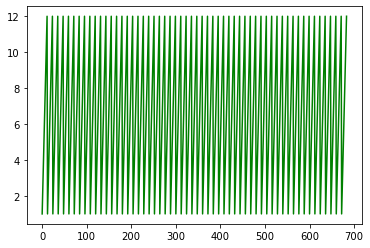

In [262]:
import matplotlib
import matplotlib.pyplot as plt


#plt.plot(start_times[0:12],psp_amps_measured[0:12],'go')
#plt.gca.set_ylim(0,-0.0004)

plt.plot(df.loc[:,'pulse_number'].values,'g')
pns=np.unique(df.loc[:,'pulse_number'].values)


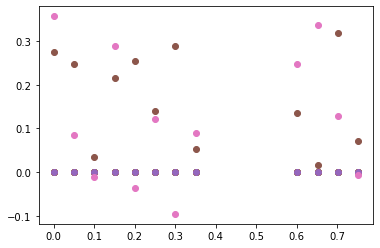

In [263]:
nstim = int(pns.max())
ncell = int(df.shape[0]/nstim)
npat=7
icell = 0
for c in range(icell*npat,(icell+1)*npat):
    ips = np.arange(nstim) + c*nstim
    T = df.loc[ips,'start_time'].values
    T = T - T[0]
    A = df.loc[ips,'psp_amp_measured'].values*1000*(-1)
    #plt.plot(T,A,'o')
    plt.plot(T,A,'o')

In [266]:
def pair_PSP_pulses(pair,desired_clamp='ic'):


    columns = ['name','area','area2','synapse_type','synapse_type2','stp_freq','stp_mean','stp_mean_fit','stp_sigma','comments','position',
    'stp_freq_vector','acsf','internal','target_temperature','clamp_mode','clamp_mode2','n_spikes','baseline_potential','baseline_rms_noise',
               'synapse_type3','references']

    df00 = pd.DataFrame([], columns=columns)

    df2 = pd.DataFrame([], columns=columns)
    df2.loc[0,'name'] = 'aba_2019_synphys_pair_'+str(pair.id)
    df2.loc[0,'area'] = 'L'+pair.pre_cell.target_layer + '; ' +  'L'+pair.post_cell.target_layer
    df2.loc[0,'area2'] = pair.experiment.target_region
    df2.loc[0,'synapse_type'] = pair.pre_cell.cre_type + '; ' +  pair.post_cell.cre_type
    df2.loc[0,'synapse_type2'] = pair.pre_cell.cre_type + ' ' + 'L'+pair.pre_cell.target_layer + '; ' +  pair.post_cell.cre_type + ' ' +'L'+ pair.post_cell.target_layer
    df2.loc[0,'position'] = [pair.pre_cell.position] + [pair.post_cell.position]
    
    if  pair.synapse_prediction is not None:
        df2.loc[0,'synapse_type3'] = pair.synapse_prediction.synapse_type
    else:
        df2.loc[0,'synapse_type3'] = ''
    
    # experiment
    df2.loc[0,'acsf'] = pair.experiment.acsf
    df2.loc[0,'target_temperature'] = pair.experiment.target_temperature
    df2.loc[0,'internal'] = pair.experiment.internal
    
    #df2.loc[0,'comments'] = 'position = ( '+ str(pair.pre_cell.position) + ', '+str(pair.post_cell.position) +' )'


    df = extract_first_pulse_info_from_Pair_object(pair, desired_clamp=desired_clamp)
    if type(df)==tuple:
        df00 = pd.concat([df00,df2],axis=0) 
        df = pd.DataFrame([])
        print('bad pair')
        
    # extract stp data to df
    ip0=12
    for s in range(df.shape[0]):
        T = df.loc[s,'start_time']
        
        ip = df.loc[s,'pulse_number']
        
        if ((ip0==12)&(ip!=1))|((ip0!=12)&(ip-ip0!=1)): # all amplitudes in series should be presented
            new_series=0
            continue
        else:
            ip0=ip
        
        a_s =  df.loc[s,'psp_amp_measured']
        af_s =  df.loc[s,'psp_amp_fit']
        if ip==1:
            T0 = T
            a = [a_s]
            af = [af_s]
            s0=s
        else:
            a =a + [a_s]
            af =af + [af_s]

        if ip==2:
            freq1 = np.around( 1/(T -T0),  decimals=2)

        if ip==8:
            T8=df.loc[s,'start_time']    
        if ip==9:
            Dfreq =np.around( 1/(T -  T8 ), decimals=2)

        if ip==11:
            T11=df.loc[s,'start_time']
        if ip==12:
            freq2 = np.around(1/(T - T11 ),decimals=2)
            df2.loc[0,'stp_freq']= str(freq1) + ' x 8_An/A1, ' + str(Dfreq)+' x 1_An/A1, ' +str(freq2) + ' x 4_An/A1'
            df2.loc[0,'stp_freq_vector']= [freq1] + [Dfreq] + [freq2] 

            df2.loc[0,'stp_mean']= a
            df2.loc[0,'stp_mean_fit']= af
            
            df2.loc[0,'clamp_mode']=pair.pulse_responses[s].stim_pulse.recording.patch_clamp_recording.clamp_mode
            df2.loc[0,'clamp_mode2']=df.loc[s,'clamp_mode']
            df2.loc[0,'n_spikes']=(df.loc[s0:s+1,'n_spikes']!=1).sum()
            #df2.loc[0,'baseline_potential']=pair.pulse_responses[s].stim_pulse.recording.patch_clamp_recording.baseline_potential
            #df2.loc[0,'baseline_rms_noise']=pair.pulse_responses[s].stim_pulse.recording.patch_clamp_recording.baseline_rms_noise
            df2.loc[0,'baseline_potential']=df.loc[s,'baseline_potential']
            df2.loc[0,'baseline_rms_noise']=df.loc[s,'baseline_rms_noise']
         
            
            
            df00 = pd.concat([df00,df2],axis=0) 
            df2 = pd.DataFrame([], columns=columns)


        #dft = pd.DataFrame(np.array([freq1,DT,freq2]))   
    df00 = df00.reset_index(drop=True) 

    return df00

In [267]:
import pandas as pd
import os

col = ['cre_type_pre','target_layer_pre','cre_type_post','target_layer_post','_cell_class_pre','_cell_class_post','is_STP']
stp_col = ['stp_initial_50hz','paired_pulse_ratio_50hz','stp_induction_50hz','stp_recovery_250ms']  

col = col + stp_col
col0 = ['cre_type','target_layer','_cell_class']
df01 = pd.DataFrame([], columns=col)

columns = ['name','area','area2','synapse_type','synapse_type2','stp_freq','stp_mean','stp_mean_fit','stp_sigma','comments','position',
    'stp_freq_vector','acsf','internal','target_temperature','clamp_mode','clamp_mode2','n_spikes','baseline_potential','baseline_rms_noise',
               'synapse_type3','references']

df00 =   pd.DataFrame([], columns=columns)  

# select all pairs
#pairq = db2.pair_query(
#    pre_class = CellClass(cre_type='vip'),
#    post_class = CellClass(cre_type='vip'),
#    synapse=True
#
#)

# Load all synapses associated with mouse V1 projects

#pairq = db2.pair_query(
#    project_name=["mouse V1 coarse matrix", "mouse V1 pre-production"],
#    synapse=True,
#
#)

## select all pairs
#pairq = db2.pair_query(
#    synapse=True
#
#)

pairq = db2.pair_query(
    project_name=["mouse V1 coarse matrix", "mouse V1 pre-production"],
    synapse=True,

)
pairsq = pairq.all()

#
for pnum in range(len(pairsq)):
    print(pnum)
    # select a pair
    #pnum=0
    pair = pairsq[pnum]
    df0 = pd.DataFrame([], columns=col)
    for c in col0:
        df0.loc[0,c+'_pre'] = pair.pre_cell.__dict__[c]
        df0.loc[0,c+'_post'] = pair.post_cell.__dict__[c] 

    if pair.dynamics is None:
        df0.loc[0,'is_STP'] = 0
    else:
        inone=0
        for cs in stp_col:
            if pair.dynamics.__dict__[cs]!=None:
                df0.loc[0,cs] = pair.dynamics.__dict__[cs]
                inone=1
        df0.loc[0,'is_STP'] = inone    
        #print(pairs[0].dynamics.stp_initial_50hz)
        #print(pairs[0].dynamics.paired_pulse_ratio_50hz)
        #print(pairs[0].dynamics.stp_induction_50hz)
        #print(pairs[0].dynamics.stp_recovery_250ms)    
    df0.index = [pnum]    
    
    df3 = pair_PSP_pulses(pair,desired_clamp='ic')
    
    
    df01 = pd.concat([df01,df0],axis=0)  
    df00 = pd.concat([df00,df3],axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
bad pair
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
2

In [268]:
df00.to_excel('aba_synapses_2.xlsx')     
df00.head()

,name,area,area2,synapse_type,synapse_type2,stp_freq,stp_mean,stp_mean_fit,stp_sigma,comments,...,acsf,internal,target_temperature,clamp_mode,clamp_mode2,n_spikes,baseline_potential,baseline_rms_noise,synapse_type3,references
0,aba_2019_synphys_pair_145,L5; L5,VisP,vip; sst,vip L5; sst L5,"50.0 x 8_An/A1, 3.95 x 1_An/A1, 50.0 x 4_An/A1","[-0.000203732631684148, -0.000449175578602308,...","[None, None, None, None, None, None, None, Non...",NaN,NaN,...,2mM Ca & Mg,Standard K-Gluc,32,vc,ic,0,-0.0583419,0.00124195,in,NaN
1,NaN,NaN,NaN,NaN,NaN,"50.0 x 8_An/A1, 1.99 x 1_An/A1, 50.0 x 4_An/A1","[0.000114019576011995, 2.62525029842559e-05, -...","[None, None, None, None, None, None, None, Non...",NaN,NaN,...,NaN,NaN,NaN,vc,ic,0,-0.0513151,0.000884975,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,"50.0 x 8_An/A1, 1.0 x 1_An/A1, 50.0 x 4_An/A1","[-0.000382587328071303, 0.00017161344709269, -...","[None, None, None, None, None, None, None, Non...",NaN,NaN,...,NaN,NaN,NaN,vc,ic,0,-0.0546622,0.0013792,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,"50.0 x 8_An/A1, 0.5 x 1_An/A1, 50.0 x 4_An/A1","[5.21454895203305e-06, -0.000190441939224441, ...","[None, None, None, None, None, None, None, Non...",NaN,NaN,...,NaN,NaN,NaN,vc,ic,0,-0.0549362,0.000809206,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,"50.0 x 8_An/A1, 0.25 x 1_An/A1, 50.0 x 4_An/A1","[-3.47852044778676e-05, -0.000511557342581702,...","[None, None, None, None, None, None, None, Non...",NaN,NaN,...,NaN,NaN,NaN,vc,ic,0,-0.0547215,0.00113082,NaN,NaN


In [225]:
pair.pulse_responses[0].stim_pulse.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d6985d9e8>,
 'first_spike_time': 5.53531,
 'duration': 0.00150000000000006,
 'next_pulse_time': None,
 'pulse_number': 1,
 'id': 1137865,
 'data_start_time': 5.53314,
 'n_spikes': 1,
 'amplitude': 0.0550000034272671,
 'onset_time': 5.53514,
 'recording_id': 113633,
 'meta': None,
 '_rec_tseries': None,
 '_stim_tseries': None,
 'recording': <aisynphys.database.database.recording at 0x7f9d69892748>}

In [229]:
pair.pulse_responses[0].pulse_response_strength.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9b9d10e9b0>,
 'neg_amp': -4.03376937083929e-12,
 'pulse_response_id': 3384110,
 'crosstalk': 1.09326831672359e-12,
 'pos_dec_latency': 0.00198000000000043,
 'pos_dec_amp': 2.73755185559828e-11,
 'pos_amp': 7.73413314409615e-12,
 'id': 173520,
 'meta': None,
 'neg_dec_latency': 0.00413000000000043,
 'neg_dec_amp': -7.11547590275365e-12}

In [241]:
pair.pulse_responses[0].stim_pulse.recording.patch_clamp_recording.multi_patch_probe[0].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d6973b748>,
 'meta': None,
 'recovery_delay': 0.252,
 'induction_frequency': 20.0,
 'id': 97627,
 'n_spikes_evoked': None,
 'patch_clamp_recording_id': 113773}

In [247]:
pair.pulse_responses[0].pulse_response_fit.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9b82e9f940>,
 'fit_yoffset': 2.32742713990319e-11,
 'fit_amp': 2.11186365883982e-12,
 'id': 173918,
 'baseline_fit_exp_amp': 6.19064482898502e-15,
 'baseline_fit_rise_time': 0.00235736646400715,
 'meta': None,
 'baseline_fit_yoffset': 2.19673168544432e-11,
 'baseline_fit_amp': 2.30459609765851e-18,
 'fit_exp_amp': 6.29052993028623e-17,
 'fit_rise_time': 0.00163917858899689,
 'fit_latency': 0.0017254163662736,
 'pulse_response_id': 3384110,
 'baseline_fit_nrmse': 0.999890069654858,
 'baseline_fit_decay_tau': 0.00496226744407309,
 'baseline_fit_latency': 0.00172988266131392,
 'fit_nrmse': 0.963457366292446,
 'fit_decay_tau': 0.00381034590119054}

In [254]:
pair.pulse_responses[0].recording.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9b9d10e390>,
 'sample_rate': None,
 'start_time': datetime.datetime(2017, 7, 18, 13, 42, 13, 199000),
 'sync_rec_id': 32186,
 'meta': None,
 'electrode_id': 6780,
 'id': 113628}

In [258]:
db2.recording.__dict__

mappingproxy({'__tablename__': 'recording',
              '__table_args__': {'comment': 'A recording represents a single contiguous sweep recorded from a single electrode.'},
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f9d6c1c4e08>,
              'sync_rec_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f9d6c1c4eb8>,
              'electrode_id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f9d6c1c4f68>,
              'start_time': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f9d6c0b2048>,
              'sample_rate': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f9d6c0b20f8>,
              'meta': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f9d6c0b21a8>,
              '__module__': 'aisynphys.database.database',
              '__doc__': None,
              '__table__': Table('recording', MetaData(bind=None), Column('id', Integer(), table=<recording>, primary_key=True, nullable=False), Column('sync_rec_i

In [243]:
db2.__dict__

{'ormbase': sqlalchemy.ext.declarative.api.Base,
 '_mappings': OrderedDict([('metadata', aisynphys.database.database.metadata),
              ('pipeline', aisynphys.database.database.pipeline),
              ('slice', aisynphys.database.database.slice),
              ('experiment', aisynphys.database.database.experiment),
              ('electrode', aisynphys.database.database.electrode),
              ('sync_rec', aisynphys.database.database.sync_rec),
              ('cell', aisynphys.database.database.cell),
              ('recording', aisynphys.database.database.recording),
              ('baseline', aisynphys.database.database.baseline),
              ('morphology', aisynphys.database.database.morphology),
              ('pair', aisynphys.database.database.pair),
              ('stim_pulse', aisynphys.database.database.stim_pulse),
              ('test_pulse', aisynphys.database.database.test_pulse),
              ('avg_response_fit',
               aisynphys.database.database.avg_

In [117]:
pair.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d698e9550>,
 'has_synapse': True,
 'has_electrical': False,
 'crosstalk_artifact': None,
 'n_ex_test_spikes': 684,
 'id': 34036,
 'n_in_test_spikes': 684,
 'experiment_id': 849,
 'distance': 0.00012646806843718,
 'pre_cell_id': 5491,
 'meta': None,
 'post_cell_id': 5484,
 'experiment': <experiment 1500408589.729>,
 'pre_cell': <cell 1500408589.729 8>,
 'post_cell': <cell 1500408589.729 1>,
 'synapse_prediction': <aisynphys.database.database.synapse_prediction at 0x7f9d698c97b8>,
 'pulse_responses': [<aisynphys.database.database.pulse_response at 0x7f9d6988b2e8>,
 'dynamics': <aisynphys.database.database.dynamics at 0x7f9d660a0860>}

In [118]:
pair.experiment.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d698fd5c0>,
 'acq_timestamp': 1500408589.729,
 'target_region': 'VisP',
 'meta': {'lims_cell_cluster_id': 773067468,
  'lims_ephys_result_id': 773067462},
 'internal': 'Standard K-Gluc',
 'acsf': '2mM Ca & Mg',
 'id': 849,
 'target_temperature': 32.0,
 'ext_id': '1500408589.729',
 'rig_name': 'MP2',
 'slice_id': 679,
 'operator_name': 'Operator P',
 'project_name': 'mouse V1 pre-production',
 'storage_path': '1500406103.560/slice_000/site_000',
 'date': datetime.datetime(2017, 7, 18, 13, 9, 49, 729000),
 'ephys_file': '2017_07_18_122629-compressed.nwb'}

In [123]:
pair.pulse_responses[0].stim_pulse.recording.patch_clamp_recording.clamp_mode
pair.pulse_responses[0].stim_pulse.recording.patch_clamp_recording.baseline_potential

pair.pulse_responses[0].stim_pulse.recording.patch_clamp_recording.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d69895c18>,
 'baseline_current': 1.37468265937191e-11,
 'stim_name': 'SPulseTrain_20Hz_DA_0',
 'clamp_mode': 'vc',
 'id': 113773,
 'qc_pass': True,
 'baseline_rms_noise': 4.977668017353e-12,
 'baseline_potential': -0.0549882125854492,
 'patch_mode': None,
 'recording_id': 113633,
 'meta': None,
 'nearest_test_pulse_id': 113891,
 'multi_patch_probe': [<aisynphys.database.database.multi_patch_probe at 0x7f9d6973b710>]}

In [137]:
pair.pulse_responses[100].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d65307f60>,
 'pair_id': 63612,
 'recording_id': 333296,
 'in_qc_pass': False,
 'data_start_time': 1.215,
 'stim_pulse_id': 3081704,
 'id': 10203561,
 'meta': {'qc_failures': {'ex': ['0 spikes detected in presynaptic recording'],
   'in': ['0 spikes detected in presynaptic recording']}},
 'ex_qc_pass': False,
 '_post_tseries': None,
 'stim_pulse': <aisynphys.database.database.stim_pulse at 0x7f9d65216e48>}

In [116]:
pair.synapse_prediction.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9d698c97f0>,
 'id': 20053,
 'ic_deconv_amp_ttest': 4.64893570807676,
 'vc_amp_ks2samp': 2.29320365588567,
 'vc_average_response': array([3.04293735e-11, 3.05133385e-11, 3.02603335e-11, 3.02245202e-11,
        3.02892049e-11, 3.02948079e-11, 3.04831242e-11, 3.03582560e-11,
        3.04237997e-11, 3.04598887e-11, 3.00351892e-11, 3.03304825e-11,
        3.03079187e-11, 3.03972097e-11, 3.02633026e-11, 3.01610407e-11,
        3.02541391e-11, 3.03104953e-11, 3.02149073e-11, 3.02580631e-11,
        3.02784434e-11, 3.03337464e-11, 3.04566234e-11, 3.03359830e-11,
        3.02702179e-11, 2.99538744e-11, 3.01122671e-11, 3.02333636e-11,
        3.05660132e-11, 3.06034127e-11, 3.02196510e-11, 3.01807595e-11,
        3.03020834e-11, 3.03099164e-11, 3.04222707e-11, 3.02995676e-11,
        3.01704053e-11, 3.03863434e-11, 3.02607124e-11, 3.02973421e-11,
        3.02167321e-11, 3.04254851e-11, 3.02860718e-11, 3.03718070e-11,
        3.038

In [29]:
db2._mappings['cell'].__table__

Table('cell', MetaData(bind=None), Column('id', Integer(), table=<cell>, primary_key=True, nullable=False), Column('experiment_id', Integer(), ForeignKey('experiment.id'), table=<cell>), Column('ext_id', String(), table=<cell>), Column('electrode_id', Integer(), ForeignKey('electrode.id'), table=<cell>), Column('cre_type', String(), table=<cell>), Column('target_layer', String(), table=<cell>), Column('position', JSONObject(), table=<cell>), Column('depth', FloatType(), table=<cell>), Column('is_excitatory', Boolean(), table=<cell>), Column('meta', JSONObject(), table=<cell>), schema=None)

In [30]:
db2._mappings['pair'].__table__


Table('pair', MetaData(bind=None), Column('id', Integer(), table=<pair>, primary_key=True, nullable=False), Column('experiment_id', Integer(), ForeignKey('experiment.id'), table=<pair>), Column('pre_cell_id', Integer(), ForeignKey('cell.id'), table=<pair>), Column('post_cell_id', Integer(), ForeignKey('cell.id'), table=<pair>), Column('has_synapse', Boolean(), table=<pair>), Column('has_electrical', Boolean(), table=<pair>), Column('crosstalk_artifact', FloatType(), table=<pair>), Column('n_ex_test_spikes', Integer(), table=<pair>), Column('n_in_test_spikes', Integer(), table=<pair>), Column('distance', FloatType(), table=<pair>), Column('meta', JSONObject(), table=<pair>), schema=None)

In [34]:
col = ['cre_type_pre','target_layer_pre','cre_type_post','target_layer_post','_cell_class_pre','_cell_class_post','is_STP']
stp_col = ['stp_initial_50hz','paired_pulse_ratio_50hz','stp_induction_50hz','stp_recovery_250ms']  

col = col + stp_col
col0 = ['cre_type','target_layer','_cell_class']

df = pd.DataFrame([],columns=col);
for i in range(len(pairs)):
    df0 = pd.DataFrame([],columns=col);
    for c in col0:
        df0.loc[0,c+'_pre'] = pairs[i].pre_cell.__dict__[c]
        df0.loc[0,c+'_post'] = pairs[i].post_cell.__dict__[c] 
    
    if pairs[i].dynamics is None:
        df0.loc[0,'is_STP'] = 0
    else:
        inone=0
        for cs in stp_col:
            if pairs[i].dynamics.__dict__[cs]!=None:
                df0.loc[0,cs] = pairs[i].dynamics.__dict__[cs]
                inone=1
        df0.loc[0,'is_STP'] = inone    
        #print(pairs[0].dynamics.stp_initial_50hz)
        #print(pairs[0].dynamics.paired_pulse_ratio_50hz)
        #print(pairs[0].dynamics.stp_induction_50hz)
        #print(pairs[0].dynamics.stp_recovery_250ms)    
    df0.index = [i]    
        
    df = pd.concat([df,df0],axis=0)
  


df.head(10)    

<cell 1500408589.729 8>

In [15]:
range(icell*npat,(icell+1)*npat)

range(0, 7)

aisynphys.database.database.cell

In [16]:
dfq = pairq.dataframe()
dfq.head(15)

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,meta
0,34036,849,5491,5484,True,False,None,684,684,0.000126,None
1,38534,1036,6411,6409,True,False,None,531,519,0.000078,None
2,41951,1193,7156,7158,True,False,None,778,774,0.000097,None
3,60972,1808,10653,10647,True,False,None,1254,132,0.000126,None
4,63612,1903,11169,11171,True,False,None,114,92,0.000120,None
5,63905,1911,11225,11226,True,False,None,225,60,0.000091,None
6,85599,2699,15424,15429,True,False,None,1572,1380,0.000140,None
7,85664,2699,15431,15424,True,False,None,1470,498,0.000070,None
8,85669,2699,15431,15429,True,False,None,1888,1696,0.000185,None
9,85926,2709,15486,15485,True,False,None,108,48,0.000082,None


95632

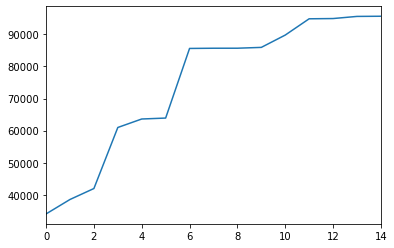

In [17]:
#dfq.loc[dfq.loc[:,'fit_amp'].abs()>1e-10,'fit_amp'].hist(bins=100)
#dfq.loc[dfq.loc[:,'manual_qc_pass']==True,'n_averaged_responses'].hist(bins=100)
dfq.loc[0:5229,'id'].plot()
dfq.loc[:,'id'].max()

In [18]:
p_avg = list(set(dfq.loc[0:5227,'pair_id']))

dfq2=dfq.loc[0:5227,:]
len(p_avg)


KeyError: 'pair_id'

In [206]:
prn = []
for ii in range(len(p_avg)):
    dfq2p = dfq2.loc[dfq2.loc[:,'pair_id']==p_avg[ii],:]
    prn = prn + [[p_avg[ii], dfq2p.shape[0]]]

In [207]:
prn = np.array(prn)


3

In [211]:
prn3 = prn[prn[:,1]==4,:]
print(prn3[0:3,:])
len(prn3)

[[49209     4]
 [49221     4]
 [65623     4]]


253

In [213]:
dfq2p = dfq2.loc[dfq2.loc[:,'pair_id']==prn3[1,0],:]
dfq2p

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,...,pair_id,id,holding,clamp_mode,fit_amp,fit_exp_amp,n_averaged_responses,manual_qc_pass,avg_data,avg_data_start_time
1767,34036,849,5491,5484,True,False,None,684,684,0.000126,...,49221,1814,-70.0,ic,5.203901e-04,1.418970e-05,2,True,"[0.00010784130673383233, 0.0001065863841170566...",-0.01073
1768,34036,849,5491,5484,True,False,None,684,684,0.000126,...,49221,1815,-55.0,ic,3.871391e-04,2.303775e-05,2,True,"[0.00010011828824584706, 9.86109872979322e-05,...",-0.01087
1769,34036,849,5491,5484,True,False,None,684,684,0.000126,...,49221,1816,-70.0,vc,-3.813688e-12,-9.249311e-16,2,True,"[-1.3785423308996993e-14, -1.2701737625229243e...",-0.01047
1770,34036,849,5491,5484,True,False,None,684,684,0.000126,...,49221,1817,-55.0,vc,-4.662528e-12,-2.370609e-15,2,True,"[6.062015469020818e-13, 7.714066530196135e-13,...",-0.01027


In [199]:
prn3 = prn[prn==3]
len(prn3)

920

In [200]:
prn3 = prn[prn==2]
len(prn3)

665

In [201]:
prn3 = prn[prn==1]
len(prn3)

126

In [174]:
idx = list(set(dfq.loc[:,'id']))
len(idx)

82

In [157]:
i=5
dfqi = dfq.loc[dfq.loc[:,'id']==idx[i],:]


In [158]:
dfqi.head()

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,meta,holding,clamp_mode,fit_amp,fit_exp_amp,n_averaged_responses,manual_qc_pass,avg_data,avg_data_start_time
120244,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-55.0,ic,-4.673330e-04,-4.020514e-04,2,False,"[-4.1133185493049585e-05, -4.0429245208049505e...",-0.010410
120245,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,ic,1.621216e-03,1.062296e-03,2,True,"[0.0004801978594686335, 0.0004764366015851464,...",-0.011670
120246,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,vc,-2.295305e-13,-6.088049e-22,2,False,"[-1.6130300817247846e-13, 1.6889447589129383e-...",-0.010110
120247,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,ic,4.819995e-05,6.875927e-05,2,False,"[-1.3916371192778836e-05, -1.5175558077839493e...",-0.011822
120248,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-55.0,ic,4.240122e-05,1.260943e-04,2,False,"[2.0051749945342004e-05, 1.9827611814207188e-0...",-0.010488


In [159]:
avt=dfqi.loc[:,'avg_data_start_time']
#dt  =avt.diff().plot()
avt.shape

(5228,)

In [160]:
avt[0:20]*1e4

120244   -104.100
120245   -116.700
120246   -101.100
120247   -118.225
120248   -104.875
120249   -102.125
120250   -101.975
120251   -106.550
120252   -102.850
120253   -101.950
120254   -106.250
120255   -102.550
120256   -102.250
120257   -106.100
120258   -103.300
120259   -108.625
120260   -103.525
120261   -102.325
120262   -107.050
120263   -103.950
Name: avg_data_start_time, dtype: float64

In [154]:
dfqi = dfqi.sort_values(by='avg_data_start_time')

In [155]:
dfqi.head(15)

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,meta,holding,clamp_mode,fit_amp,fit_exp_amp,n_averaged_responses,manual_qc_pass,avg_data,avg_data_start_time
124730,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,ic,-7.685990e-05,2.141313e-04,2,False,"[5.664016532191691e-05, 5.590135523528012e-05,...",-0.013370
123322,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-55.0,ic,9.353505e-05,5.551115e-18,2,False,"[-0.00011809748789717393, -0.00013882423685526...",-0.013275
123757,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,ic,-4.961079e-04,-5.979464e-04,2,False,"[-2.1711785354338632e-05, -2.5452834729972236e...",-0.013145
123442,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,vc,-7.173742e-12,-1.330106e-21,2,True,"[-3.8801425812459434e-13, 3.7636919990196686e-...",-0.012755
120869,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,vc,-7.417885e-13,-7.385069e-21,2,False,"[7.978409414880731e-13, 1.4690596628416656e-12...",-0.012750
120883,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,vc,-7.060015e-14,-1.760629e-15,2,False,"[-4.5754792215399e-14, 3.7188874375400645e-14,...",-0.012750
123191,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,ic,2.206236e-03,1.151640e-04,2,True,"[0.00016267167919956183, 0.0001650068608359078...",-0.012730
123161,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,ic,7.683751e-03,1.313386e-04,2,False,"[0.0008098120762910869, 0.0008087085351666295,...",-0.012730
120648,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-70.0,vc,-7.469083e-12,-5.525566e-22,2,True,"[-3.015760108733522e-14, -6.916789430102657e-1...",-0.012670
125028,50724,1488,8799,8802,True,False,None,64,64,0.000197,None,-55.0,ic,-1.938689e-04,-4.425304e-04,2,True,"[-1.0140977092584422e-05, -7.4479686315067255e...",-0.012670


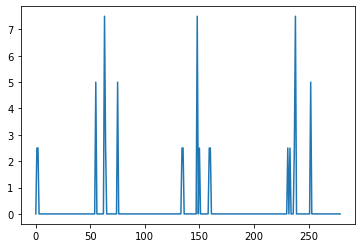

In [156]:
tt=dfqi.loc[:,'avg_data_start_time']
tt=tt.reset_index(drop=True)
dtt=tt.diff()

#plt.plot(dtt.values[2105:2500]*100000000)
plt.plot(dtt.values[2220:2500]*1e6)


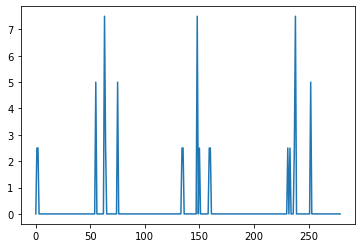

In [142]:
tt=dfqi.loc[:,'avg_data_start_time']
tt=tt.reset_index(drop=True)
dtt=tt.diff()

#plt.plot(dtt.values[2105:2500]*100000000)
plt.plot(dtt.values[2220:2500]*1e6)


In [140]:
print(dtt.values[2220:2250]*1000000)

[0.00000000e+00 2.50000000e+00 2.50000000e+00 0.00000000e+00
 0.00000000e+00 1.99493200e-10 0.00000000e+00 2.01227923e-10
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


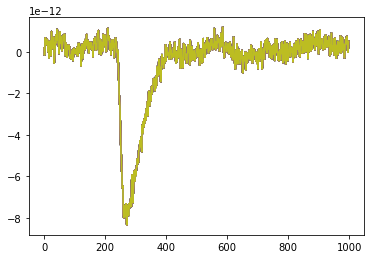

In [173]:
import matplotlib
import matplotlib.pyplot as plt
#dfq.loc[0,'avg_data'].plot()
for i in range(len(idx)-3):
    dfqi = dfq.loc[dfq.loc[:,'id']==idx[i],:]
    #dfqi =  av
    plt.plot(dfq.loc[12,'avg_data'])

In [163]:
len(idx)

82

In [29]:
pairql = pairq.all()

In [31]:
pairql

[(<pair 1500408589.729 8 1>,
  -55.0,
  'ic',
  -0.00046733299245126,
  -0.000402051446924873),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'ic',
  0.00162121601185261,
  0.00106229637463137),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'vc',
  -2.29530454352767e-13,
  -6.08804930839028e-22),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'ic',
  4.81999491789451e-05,
  6.8759270537605e-05),
 (<pair 1500408589.729 8 1>,
  -55.0,
  'ic',
  4.24012191912569e-05,
  0.000126094316648734),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'vc',
  -1.65065991646605e-13,
  -1.93722367162821e-14),
 (<pair 1500408589.729 8 1>,
  -55.0,
  'vc',
  -5.38575976413912e-17,
  -1.69134446698458e-15),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'ic',
  -8.83498092843899e-05,
  1.00109778686241e-06),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'vc',
  1.30795567147099e-12,
  -7.91823587906449e-17),
 (<pair 1500408589.729 8 1>,
  -55.0,
  'vc',
  6.4792183686827e-12,
  1.11022302462516e-24),
 (<pair 1500408589.729 8 1>,
  -70.0,
  'ic',

In [101]:
print("loaded %d synapses ,mouse V1 coarse matrix, mouse V1 pre-production synapse=True" % len(pairs))
print("loaded %d synapses synapse=True" % len(pairs2))

loaded 2007 synapses ,mouse V1 coarse matrix, mouse V1 pre-production synapse=True
loaded 2007 synapses synapse=True


## 2. Classify cells

We will pick four simple class defintions for this analysis:

In [102]:
cell_classes = {

    'pyr': CellClass(cell_class='ex', name='pyr'),

    'pvalb': CellClass(cre_type='pvalb', name='pvalb'),

    'sst': CellClass(cre_type='sst', name='sst'),

    'vip': CellClass(cre_type='vip', name='vip'),

}   

# get a list of all cells in the selected pairs

cells = set([pair.pre_cell for pair in pairs] + [pair.post_cell for pair in pairs])

In [115]:
i=2
pairs[i].pre_cell.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdda83bc2e8>,
 'position': [-0.003329620311127347,
  3.0011687682138713e-05,
  0.0002876599319279194],
 'cre_type': 'tlx3',
 'ext_id': '4',
 'id': 36,
 'meta': {'lims_specimen_id': 898508520},
 'depth': 7.09100568201393e-05,
 'target_layer': '5',
 'electrode_id': 47,
 'experiment_id': 6,
 'is_excitatory': True,
 '_cell_class': -1,
 '_cell_class_nonsynaptic': -1,
 'experiment': <experiment 1492460382.776>}

In [116]:
pairs[i].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdda8b804e0>,
 'has_synapse': True,
 'has_electrical': False,
 'crosstalk_artifact': None,
 'n_ex_test_spikes': 480,
 'id': 209,
 'n_in_test_spikes': 0,
 'experiment_id': 6,
 'distance': 5.10837935089354e-05,
 'pre_cell_id': 36,
 'meta': None,
 'post_cell_id': 40,
 'pre_cell': <cell 1492460382.776 4>,
 'post_cell': <cell 1492460382.776 6>,
 'dynamics': <aisynphys.database.database.dynamics at 0x7fdda8648208>}

In [118]:
print(pairs[i].dynamics.stp_initial_50hz)
print(pairs[i].dynamics.paired_pulse_ratio_50hz)
print(pairs[i].dynamics.stp_induction_50hz)
print(pairs[i].dynamics.stp_recovery_250ms)

#print(pairs[i].dynamics.__dict__['paired_pulse_ratio_50hz'])
pairs[i].dynamics.__dict__

-0.0421472443814687
0.184841075894267
-0.0849962656235486
0.0176234435853376
0.184841075894267


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdda8648390>,
 'noise_amp_90th_percentile': 0.000217288568310086,
 'stp_recovery_250ms_std': 0.174434028702331,
 'stp_recovery_250ms': 0.0176234435853376,
 'stp_induction_50hz_n': 25.0,
 'stp_induction_50hz': -0.0849962656235486,
 'stp_initial_50hz_n': 25.0,
 'paired_pulse_ratio_50hz': 0.184841075894267,
 'id': 43,
 'meta': None,
 'pulse_amp_90th_percentile': 0.000319559671073484,
 'stp_recovery_250ms_n': 15.0,
 'stp_induction_50hz_std': 0.580722894862756,
 'stp_initial_50hz_std': 0.646377921083952,
 'stp_initial_50hz': -0.0421472443814687,
 'pair_id': 209}

In [121]:
pairs[i].post_cell.__dict__['experiment'].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdda98a6be0>,
 'acq_timestamp': 1492460382.776,
 'target_region': 'VisP',
 'meta': {'lims_cell_cluster_id': 773067132,
  'lims_ephys_result_id': 773067095},
 'internal': 'Standard K-Gluc',
 'acsf': '2mM Ca & Mg',
 'id': 6,
 'target_temperature': 32.0,
 'ext_id': '1492460382.776',
 'rig_name': 'MP2',
 'slice_id': 2,
 'operator_name': 'Operator P',
 'project_name': 'mouse V1 pre-production',
 'storage_path': '1492457804.399/slice_000/site_000',
 'date': datetime.datetime(2017, 4, 17, 13, 19, 42, 776000),
 'ephys_file': '2017_04_17_123713.nwb'}

In [177]:
#from aisynphys import avg_response_fit
def response_query(session, pair, max_ind_freq=50):
    """Query pulse responses appropriate for generating nice average PSP/PSC shapes.
    
    - Only select from multipatch probes with induction frequencies <= 50Hz
    """
    q = session.query(db.PulseResponse, db.PatchClampRecording, db.StimPulse)
    
    q = q.join(db.StimPulse, db.PulseResponse.stim_pulse)
    q = q.join(db.StimSpike, db.StimSpike.stim_pulse_id==db.StimPulse.id)
    q = q.join(db.Recording, db.PulseResponse.recording)
    q = q.join(db.PatchClampRecording)
    q = q.join(db.MultiPatchProbe)
    #q = q.join(db.avg_response_fit)
    
    q = q.filter(db.PulseResponse.pair_id == pair.id)
    q = q.filter(db.MultiPatchProbe.induction_frequency <= max_ind_freq)
    
    return q

In [178]:
s = db2.session(readonly=True)

In [179]:
pair=pairs[i]
max_ind_freq=50

records = response_query(session=s, pair=pair).all()
#prof('query prs')
pulse_responses = [rec[0] for rec in records]
#sorted_responses = sort_responses(pulse_responses)
#prof('sort prs')

In [157]:
len(pulse_responses)
pulse_responses[0].__dict__

#rss=pulse_responses.items()
#responses = rss[0]
#responses['qc_pass']

for ii in range(200,300):
    DT=pulse_responses[ii].__dict__['data_start_time'] - pulse_responses[ii-1].__dict__['data_start_time']
    print(DT)


0.5030000000000001
0.020000000000000018
0.020000000000000018
0.020000000000000018
-0.2030000000000003
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
1.0030000000000001
0.020000000000000018
0.020000000000000018
0.020000000000000018
-2.26602
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.019999999999999796
2.0030200000000002
0.020000000000000018
0.020000000000000018
0.020000000000000018
-2.20302
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.019999999999999796
4.00302
0.020000000000000462
0.019999999999999574
0.020000000000000462
-3.27098
0.020000000000000018
0.019999999999999574
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.020000000000000018
0.2530000000000001
0.020000000000000018
0.020000

In [153]:
pulse_responses[99].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdda806bef0>,
 'pair_id': 209,
 'recording_id': 9713,
 'in_qc_pass': False,
 'data_start_time': 5.07808,
 'stim_pulse_id': 98524,
 'id': 284495,
 'meta': {'qc_failures': {'ex': [],
   'in': ['Response window baseline of -70.7 mV is outside of bounds [-60mV, -45mV]',
    'Recording baseline of -70.9 mV is outside of bounds [-60mV, -45mV]']}},
 'ex_qc_pass': True,
 '_post_tseries': None}

In [132]:
pair=pairs[i]
max_ind_freq=50

q = s.query(db2.PulseResponse, db2.PatchClampRecording, db2.StimPulse)
    
q = q.join(db2.StimPulse, db2.PulseResponse.stim_pulse)
q = q.join(db2.StimSpike, db2.StimSpike.stim_pulse_id==db2.StimPulse.id)
q = q.join(db2.Recording, db2.PulseResponse.recording)
q = q.join(db2.PatchClampRecording)
q = q.join(db2.MultiPatchProbe)
    
q = q.filter(db2.PulseResponse.pair_id == pair.id)
q = q.filter(db2.MultiPatchProbe.induction_frequency <= max_ind_freq)
q

In [133]:
q.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x7fdda8304908>,
 '_polymorphic_adapters': {},
 '_entities': [<sqlalchemy.orm.query._MapperEntity at 0x7fdda3738b00>,
 '_primary_entity': <sqlalchemy.orm.query._MapperEntity at 0x7fdda3738b00>,
 '_has_mapper_entities': True,
 '_mapper_adapter_map': {aisynphys.database.database.pulse_response: (<Mapper at 0x7fddac4538d0; pulse_response>,
   None),
  aisynphys.database.database.patch_clamp_recording: (<Mapper at 0x7fddac48dcf8; patch_clamp_recording>,
   None),
  aisynphys.database.database.stim_pulse: (<Mapper at 0x7fddac440438; stim_pulse>,
   None)},
 '_joinpoint': {'_joinpoint_entity': aisynphys.database.database.multi_patch_probe},
 '_filter_aliases': (),
 '_join_entities': (<Mapper at 0x7fddac440438; stim_pulse>,
  <Mapper at 0x7fddac440ef0; stim_spike>,
  <Mapper at 0x7fddac48d048; recording>,
  <Mapper at 0x7fddac48dcf8; patch_clamp_recording>,
  <Mapper at 0x7fddac49d8d0; multi_patch_probe>),
 '_joinpath': {(<Mapper at 0x7fddac4538d

In [109]:
import pandas as pd

col = ['cre_type_pre','target_layer_pre','cre_type_post','target_layer_post','_cell_class_pre','_cell_class_post','is_STP']
stp_col = ['stp_initial_50hz','paired_pulse_ratio_50hz','stp_induction_50hz','stp_recovery_250ms']  

col = col + stp_col
col0 = ['cre_type','target_layer','_cell_class']

df = pd.DataFrame([],columns=col);
for i in range(len(pairs)):
    df0 = pd.DataFrame([],columns=col);
    for c in col0:
        df0.loc[0,c+'_pre'] = pairs[i].pre_cell.__dict__[c]
        df0.loc[0,c+'_post'] = pairs[i].post_cell.__dict__[c] 
    
    if pairs[i].dynamics is None:
        df0.loc[0,'is_STP'] = 0
    else:
        inone=0
        for cs in stp_col:
            if pairs[i].dynamics.__dict__[cs]!=None:
                df0.loc[0,cs] = pairs[i].dynamics.__dict__[cs]
                inone=1
        df0.loc[0,'is_STP'] = inone    
        #print(pairs[0].dynamics.stp_initial_50hz)
        #print(pairs[0].dynamics.paired_pulse_ratio_50hz)
        #print(pairs[0].dynamics.stp_induction_50hz)
        #print(pairs[0].dynamics.stp_recovery_250ms)    
    df0.index = [i]    
        
    df = pd.concat([df,df0],axis=0)
  


df.head(10)    

,cre_type_pre,target_layer_pre,cre_type_post,target_layer_post,_cell_class_pre,_cell_class_post,is_STP,stp_initial_50hz,paired_pulse_ratio_50hz,stp_induction_50hz,stp_recovery_250ms
0,vip,5,sst,5,-1,-1,0,NaN,NaN,NaN,NaN
1,sst,5,vip,5,-1,-1,0,NaN,NaN,NaN,NaN
2,tlx3,5,tlx3,5,-1,-1,1,-0.0421472,0.184841,-0.0849963,0.0176234
3,sst,5,vip,5,-1,-1,0,NaN,NaN,NaN,NaN
4,sst,5,vip,5,-1,-1,0,NaN,NaN,NaN,NaN
5,tlx3,5,tlx3,5,-1,-1,0,NaN,NaN,NaN,NaN
6,vip,5,sst,5,-1,-1,0,NaN,NaN,NaN,NaN
7,sst,5,vip,5,-1,-1,1,0.0555144,1.34556,0.367114,0.156889
8,sst,5,vip,5,-1,-1,1,0.0593788,1.81675,0.323405,0.153674
9,unknown,2/3,unknown,2/3,-1,-1,1,0.187441,1.62078,-0.114559,0.031421


In [110]:
print('with STP:')
print(df.loc[:,'is_STP'].sum())
df1 = df.loc[df.loc[:,'is_STP']==1,:]
df1.head()

with STP:
957


,cre_type_pre,target_layer_pre,cre_type_post,target_layer_post,_cell_class_pre,_cell_class_post,is_STP,stp_initial_50hz,paired_pulse_ratio_50hz,stp_induction_50hz,stp_recovery_250ms
2,tlx3,5,tlx3,5,-1,-1,1,-0.0421472,0.184841,-0.0849963,0.0176234
7,sst,5,vip,5,-1,-1,1,0.0555144,1.34556,0.367114,0.156889
8,sst,5,vip,5,-1,-1,1,0.0593788,1.81675,0.323405,0.153674
9,unknown,2/3,unknown,2/3,-1,-1,1,0.187441,1.62078,-0.114559,0.031421
11,unknown,2,unknown,2,-1,-1,1,-0.315572,0.593403,-0.514315,-0.0356957


In [111]:
id1 = np.array(list(set(df1.loc[:,'cre_type_pre'])))
id2 = np.array(list(set(df1.loc[:,'cre_type_post'])))

print(id1)
print(id2)

id1=id1[id1!='unknown']
id1=id1[id1!='sim1,pvalb']
id1=id1[id1!='pvalb,sst']

id2=id2[id2!='unknown']


print(id1)
print(id2)

all_synTP = pd.DataFrame(np.zeros((len(id1),len(id2))), columns=id2, index=id1)
for i in id1:
    for j in id2:
        all_synTP.loc[i,j] = df1.loc[(df1.loc[:,'cre_type_pre']==i)&(df1.loc[:,'cre_type_post']==j),'is_STP'].sum()

print('all syntypes')
print((all_synTP>0).sum().sum())

df1.to_excel('ABI_STP_with_dynamics.xlsx')

all_synTP        

['tlx3' 'slc17a8' 'ntsr1' 'nr5a1' 'sim1,pvalb' 'sst' 'rorb' 'vip'
 'unknown' 'pvalb' 'pvalb,sst' 'rbp4' 'sim1']
['tlx3' 'slc17a8' 'ntsr1' 'fam84b' 'nr5a1' 'sst' 'sim1' 'rorb' 'vip'
 'pvalb' 'rbp4' 'unknown']
['tlx3' 'slc17a8' 'ntsr1' 'nr5a1' 'sst' 'rorb' 'vip' 'pvalb' 'rbp4' 'sim1']
['tlx3' 'slc17a8' 'ntsr1' 'fam84b' 'nr5a1' 'sst' 'sim1' 'rorb' 'vip'
 'pvalb' 'rbp4']
all syntypes
35


,tlx3,slc17a8,ntsr1,fam84b,nr5a1,sst,sim1,rorb,vip,pvalb,rbp4
tlx3,19.0,0.0,0.0,2.0,0.0,17.0,0.0,0.0,2.0,13.0,0.0
slc17a8,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ntsr1,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,0.0
nr5a1,0.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0,3.0,11.0,0.0
sst,10.0,0.0,2.0,0.0,5.0,47.0,7.0,0.0,17.0,23.0,0.0
rorb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
vip,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,7.0,4.0,0.0
pvalb,17.0,0.0,7.0,0.0,18.0,7.0,7.0,0.0,8.0,175.0,0.0
rbp4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
sim1,0.0,0.0,0.0,0.0,0.0,4.0,53.0,0.0,0.0,4.0,0.0


35

In [37]:
# Classify each cell. Note that, depending on the class definitions above, a cell could 

# belong to multiple classes. 

cell_class = {}

for cell in cells:

    # which of the classes defined above is this cell a member of?

    cell_in_classes = [cls_name for cls_name, cls in cell_classes.items() if cell in cls]

    cell_class[cell] = ','.join(cell_in_classes)

## 3. Construct a dataframe

Now we build a dataframe with one row per synapse that contains the pre/postsynaptic cell class names as well as a measure of short-term plasticity.

import pandas

In [48]:
# construct a pandas dataframe containing the pre/postsynaptic cell class names

# and a measure of short-term plasticity

pre_class = [cell_class[pair.pre_cell] for pair in pairs]

post_class = [cell_class[pair.post_cell] for pair in pairs]

stp = [None if pair.dynamics is None else pair.dynamics.stp_induction_50hz for pair in pairs]
print(np.array(stp)==None)

False


In [40]:
df = pd.DataFrame(

    zip(pairs, pre_class, post_class, stp), 

    columns=['pair', 'pre_class', 'post_class', 'stp']) 

In [41]:
# select out only cells that are a member of exactly 1 class

mask = df.pre_class.isin(cell_classes) & df.post_class.isin(cell_classes)

df = df[mask]

In [43]:
# select only pairs with a measured stp

df = df.dropna()
print(df.shape)
df.head()

(597, 4)


,pair,pre_class,post_class,stp
2,<pair 1492460382.776 4 6>,pyr,pyr,-0.084996
7,<pair 1490997794.081 8 2>,sst,vip,0.367114
8,<pair 1490997794.081 8 7>,sst,vip,0.323405
9,<pair 1501101571.166 1 5>,pyr,pyr,-0.114559
16,<pair 1484862803.120 1 7>,pvalb,pvalb,-0.347905


In [ ]:
4. Calculate average STP metric for each pre/post pairing

In [ ]:
stp = df.pivot_table('stp', 'pre_class', 'post_class', aggfunc=np.mean)

In [ ]:
# sort rows/cols into the expected order

order = list(cell_classes)

stp = stp[order].loc[order]



stp